In [256]:
import GetOldTweets3 as got
import pandas as pd
import csv
import tweepy
import wordcloud
import matplotlib.pyplot as plt

In [13]:
#accessing twitter
API_KEY = "MX5o2MunEoqgUKd1DLhPmWzVS"
API_SECRET = "IwiEJ13PUkHtRUzQUAyz8Tq7AdX0yIhSlaxQxhSEMTRy6fm05q"
ACCESS_TOKEN = "1223292053184008195-HaMZR7eK0RHH3PzrPspNKndwZnais8"
ACCESS_TOKEN_SECRET = "jTBPAztCMJPo1zsrCjvrecKBTWaTmRJ4vQiaYRh5tmdkP"

auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

In [239]:
#extracting tweets via API
text_query = 'corona virus'
since_date = '2020-01-21'
until_date = '2020-02-03'
user = 'WHO'
count = 10000000000000
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query).setUsername(user).setSince(since_date).setUntil(until_date).setMaxTweets(count)
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
text_tweets = [[tweet.date, tweet.text, tweet.retweets] for tweet in tweets]

In [123]:
#text_tweets

In [240]:
#turning the list into a dataframe
tweetsdf = pd.DataFrame(text_tweets)

In [241]:
tweetsdf

,0,1,2
0,2020-02-02 17:07:23+00:00,Q: Can regularly rinsing your nose w...,204
1,2020-02-02 15:34:58+00:00,Q: Can gargling mouthwash protect yo...,280
2,2020-01-30 20:11:47+00:00,The full statement by @DrTedros on I...,669
3,2020-01-30 18:10:27+00:00,WHO is proposing ‘2019-nCoV’ as an i...,159
4,2020-01-30 18:08:54+00:00,Public health efforts are targeted a...,98
...,...,...,...
117,2020-01-22 11:26:33+00:00,The International Health Regulations...,820
118,2020-01-21 21:41:05+00:00,"Today, the #UnitedStates reported it...",708
119,2020-01-21 21:01:55+00:00,"On 20 January 2020, Republic of #Kor...",108
120,2020-01-21 20:29:21+00:00,WHO situation report on novel #coron...,593


In [242]:
#adding columns names
tweetsdf.columns = ['Date','Tweet', 'Retweet']

In [243]:
#sorting values by date
tweetsdf.sort_values('Date',ascending=True, inplace=True)
tweetsdf.head(200)

,Date,Tweet,Retweet
121,2020-01-21 19:05:42+00:00,List of proposed members and adviser...,86
120,2020-01-21 20:29:21+00:00,WHO situation report on novel #coron...,593
119,2020-01-21 21:01:55+00:00,"On 20 January 2020, Republic of #Kor...",108
118,2020-01-21 21:41:05+00:00,"Today, the #UnitedStates reported it...",708
117,2020-01-22 11:26:33+00:00,The International Health Regulations...,820
...,...,...,...
4,2020-01-30 18:08:54+00:00,Public health efforts are targeted a...,98
3,2020-01-30 18:10:27+00:00,WHO is proposing ‘2019-nCoV’ as an i...,159
2,2020-01-30 20:11:47+00:00,The full statement by @DrTedros on I...,669
1,2020-02-02 15:34:58+00:00,Q: Can gargling mouthwash protect yo...,280


In [244]:
tweetsdf['Date'] = pd.to_datetime(tweetsdf['Date'])
tweetsdf['Date'] = [d.date() for d in tweetsdf['Date']]
tweetsdf.head(200)

,Date,Tweet,Retweet
121,2020-01-21,List of proposed members and adviser...,86
120,2020-01-21,WHO situation report on novel #coron...,593
119,2020-01-21,"On 20 January 2020, Republic of #Kor...",108
118,2020-01-21,"Today, the #UnitedStates reported it...",708
117,2020-01-22,The International Health Regulations...,820
...,...,...,...
4,2020-01-30,Public health efforts are targeted a...,98
3,2020-01-30,WHO is proposing ‘2019-nCoV’ as an i...,159
2,2020-01-30,The full statement by @DrTedros on I...,669
1,2020-02-02,Q: Can gargling mouthwash protect yo...,280


In [245]:
tweetsdf.head(200)

,Date,Tweet,Retweet
121,2020-01-21,List of proposed members and adviser...,86
120,2020-01-21,WHO situation report on novel #coron...,593
119,2020-01-21,"On 20 January 2020, Republic of #Kor...",108
118,2020-01-21,"Today, the #UnitedStates reported it...",708
117,2020-01-22,The International Health Regulations...,820
...,...,...,...
4,2020-01-30,Public health efforts are targeted a...,98
3,2020-01-30,WHO is proposing ‘2019-nCoV’ as an i...,159
2,2020-01-30,The full statement by @DrTedros on I...,669
1,2020-02-02,Q: Can gargling mouthwash protect yo...,280


In [246]:
#condensing dates and adding up the number of retweets
condense = lambda a: "/".join(a) 
finalds = tweetsdf.groupby(by='Date').agg({'Tweet': condense, 'Retweet': 'sum'}).reset_index()

In [149]:
finalds

,Date,Tweet,Retweet
0,2020-01-21,List of proposed members and adviser...,1495
1,2020-01-22,The International Health Regulations...,6683
2,2020-01-23,Stay healthy while travelling! Avoid...,10806
3,2020-01-25,WHO’s risk assessment of the new #co...,4939
4,2020-01-26,@Benzie135 Hi. Thank you for your qu...,3832
5,2020-01-27,Current estimates of the new #corona...,12862
6,2020-01-28,WHO Director-General @DrTedros today...,3219
7,2020-01-29,Live from Geneva on the new #coronav...,5200
8,2020-01-30,The International Health Regulations...,2985


In [148]:
pd.set_option('max_colwidth', 40)

In [247]:
finalds

,Date,Tweet,Retweet
0,2020-01-21,List of proposed members and adviser...,1495
1,2020-01-22,The International Health Regulations...,6683
2,2020-01-23,Stay healthy while travelling! Avoid...,10807
3,2020-01-25,WHO’s risk assessment of the new #co...,4939
4,2020-01-26,@Benzie135 Hi. Thank you for your qu...,3832
5,2020-01-27,Current estimates of the new #corona...,12861
6,2020-01-28,WHO Director-General @DrTedros today...,3219
7,2020-01-29,Live from Geneva on the new #coronav...,5200
8,2020-01-30,The International Health Regulations...,2984
9,2020-02-02,Q: Can gargling mouthwash protect yo...,484


In [248]:
[tweetsdf['Date'].value_counts()]

[2020-01-23    34
 2020-01-22    31
 2020-01-27    15
 2020-01-30    12
 2020-01-28    10
 2020-01-29     8
 2020-01-26     5
 2020-01-21     4
 2020-02-02     2
 2020-01-25     1
 Name: Date, dtype: int64]

In [249]:
df_val_counts = pd.DataFrame(tweetsdf['Date'].value_counts())
df_val_counts

,Date
2020-01-23,34
2020-01-22,31
2020-01-27,15
2020-01-30,12
2020-01-28,10
2020-01-29,8
2020-01-26,5
2020-01-21,4
2020-02-02,2
2020-01-25,1


In [250]:
#getting rid of dates as index column
df_val_counts['Dates'] = df_val_counts.index
df_val_counts.reset_index(level=0, inplace=True)
df_val_counts

,index,Date,Dates
0,2020-01-23,34,2020-01-23
1,2020-01-22,31,2020-01-22
2,2020-01-27,15,2020-01-27
3,2020-01-30,12,2020-01-30
4,2020-01-28,10,2020-01-28
5,2020-01-29,8,2020-01-29
6,2020-01-26,5,2020-01-26
7,2020-01-21,4,2020-01-21
8,2020-02-02,2,2020-02-02
9,2020-01-25,1,2020-01-25


In [251]:
df_val_counts.drop('index',1)

,Date,Dates
0,34,2020-01-23
1,31,2020-01-22
2,15,2020-01-27
3,12,2020-01-30
4,10,2020-01-28
5,8,2020-01-29
6,5,2020-01-26
7,4,2020-01-21
8,2,2020-02-02
9,1,2020-01-25


In [252]:
df_val_counts.sort_values(by='Dates')

,index,Date,Dates
7,2020-01-21,4,2020-01-21
1,2020-01-22,31,2020-01-22
0,2020-01-23,34,2020-01-23
9,2020-01-25,1,2020-01-25
6,2020-01-26,5,2020-01-26
2,2020-01-27,15,2020-01-27
4,2020-01-28,10,2020-01-28
5,2020-01-29,8,2020-01-29
3,2020-01-30,12,2020-01-30
8,2020-02-02,2,2020-02-02


In [253]:
#replacing the count of tweets by the tweets in the original table
finalds['Tweet'] = df_val_counts['Date']

In [254]:
#renaming columns
finalds.columns = ['date', 'tweets', 'retweets']
finalds

,date,tweets,retweets
0,2020-01-21,34,1495
1,2020-01-22,31,6683
2,2020-01-23,15,10807
3,2020-01-25,12,4939
4,2020-01-26,10,3832
5,2020-01-27,8,12861
6,2020-01-28,5,3219
7,2020-01-29,4,5200
8,2020-01-30,2,2984
9,2020-02-02,1,484


In [289]:
import re

In [351]:
#leaning tweets to create a wordcloud if possible
tweetsdf['Tweet'].values
tweetsdf['Tweet'] = tweetsdf.Tweet.str.replace('\'','')
tweetsdf['Tweet'] = tweetsdf.Tweet.str.replace('\@','') 
tweetsdf['Tweet'] = tweetsdf['Tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [352]:
pd.set_option('max_colwidth', 400)
tweetsdf[['Tweet']] 

,Tweet
121,List of proposed members and advisers to International Health Regulations Emergency Committee for pneumonia due to the novel #coronavirus (2019-nCoV)
120,WHO situation report on novel #coronavirus (2019-nCoV)- 21 January 2020 (data from 20 January 2020)
119,"On 20 January 2020, Republic of #Korea reported its first case of novel #coronavirus (2019-nCoV) in a traveller recently returned from #Wuhan, #China"
118,"Today, the #UnitedStates reported its first case of novel #coronavirus (2019-nCoV) in a traveller recently returned from #Wuhan, #China"
117,The International Health Regulations Emergency Committee on the new #coronavirus (2019-nCoV) convened by DrTedros is currently ongoing. Read more about the Emergency Committee
...,...
4,Public health efforts are targeted at limiting further transmission in countries with imported new #coronavirus (2019-nCoV) acute respiratory disease cases which depends critically on the ability to detect the pathogen WHO Situation Report 30 January 2020
3,WHO is proposing ‘2019-nCoV’ as an interim name of the virus. The final decision on the official name of the virus will be made by the International Committee on Taxonomy of Viruses. WHO Situation Report 30 January 2020 #coronavirus
2,The full statement by DrTedros on IHR Emergency Committee on new #coronavirus
1,Q: Can gargling mouthwash protect you from infection with the #2019nCoV? A: No. There is no evidence that using mouthwash will protect you from infection with the new coronavirus. #KnowYourFacts


In [353]:
#turning tweets into tuples to use on wordcloud
tuples = [tuple(x) for x in tweetsdf['Tweet']]

In [363]:
#turning tweets into dict to use on worldcloud (didn't work with tuples)
data = dict(zip(tweetsdf['Tweet'].tolist(), finalds['tweets'].tolist()))

data

{'List of proposed members and advisers to International Health Regulations Emergency Committee for pneumonia due to the novel #coronavirus (2019-nCoV) ': 34,
 'WHO situation report on novel #coronavirus (2019-nCoV)- 21 January 2020  (data from 20 January 2020)': 31,
 'On 20 January 2020, Republic of #Korea reported its first case of novel #coronavirus (2019-nCoV) in a traveller recently returned from #Wuhan, #China ': 15,
 'Today, the #UnitedStates reported its first case of novel #coronavirus (2019-nCoV) in a traveller recently returned from #Wuhan, #China ': 12,
 'The International Health Regulations Emergency Committee on the new #coronavirus (2019-nCoV) convened by DrTedros is currently ongoing. Read more about the Emergency Committee ': 10,
 'Dr Didier Houssin, chairperson of the International Health Regulations Emergency Committee on the new #coronavirus (2019-nCoV), chairing todays meeting. List of members and advisers of the Emergency Committee ': 8,
 'The Emergency Committee 

In [355]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)

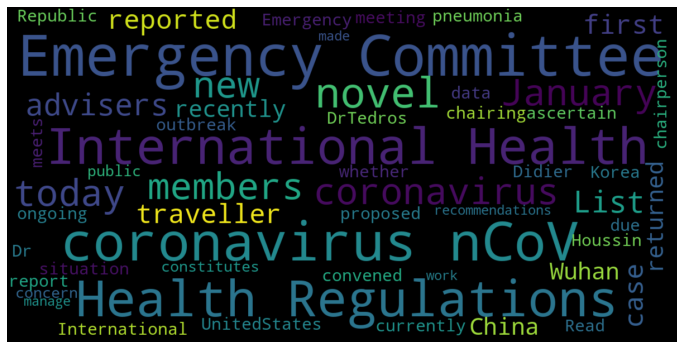

In [379]:
#creating the wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.show()
    
show_wordcloud(data, title = None)